# USED CARS PREDICTIONS

In [2]:
from IPython.display import Image
Image(url= "https://etimg.etb2bimg.com/photo/76468622.cms")

# Introduction

#### A car is a wheeled motor vehicle used for transportation. Most definitions of cars say that they run primarily on roads, seat one-to-eight people, have four wheels and mainly transport people rather than goods.
#### Cars came into global use during the 20th century, and developed economies depend on them.
#### Predicting the price of used cars in both an important and interesting problem.
#### Sometimes selling your used car becomes crucial as we are not able to identify its fair price accurately. The depreciation of a car depends on a variety of factors so the car owner needs to be aware of the worth of their vehicle. With the rapid expansion of Machine Learning, this problem can also be solved by minimizing human efforts and time. 
#### Let’s see an end-to-end solution for a similar problem.

# Importing required packages

#### My primary packages for this project are going to be pandas for data processing, NumPy to work with arrays, matplotlib & seaborn for data visualizations, and finally scikit-learn for building an evaluating our ML model.

#### Let’s import all the required packages into our python environment.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocessing,normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV

#### Above I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

# Loading excel data

#### Now I am going to upload or read the files/data-sets using pandas. For this I used read_xlsx method.

In [2]:
df = pd.read_excel('webscrapping car price prediction.xlsx')
df.head()

,year,brand,cars_model,cars_variant,cars_km_driven,car_installment_price_permonth,cars_downpayment,car_price
0,2015,Maruti Alto K10,VXI AMT Manual,Petrol,9013.0,7585.0,Zero downpayment,340999.0
1,2015,Hyundai Grand i10,ASTA 1.2 AT VTVT Automatic,Petrol,10438.0,10824.0,Zero downpayment,486599.0
2,2012,Maruti Wagon R 1.0,VXI Manual,Petrol,21852.0,5804.0,Zero downpayment,260899.0
3,2013,Maruti Wagon R 1.0,VXI Manual,Petrol,17781.0,6733.0,Zero downpayment,302699.0
4,2016,Maruti Wagon R 1.0,VXI AMT Automatic,Petrol,9520.0,8631.0,Zero downpayment,387999.0


In [3]:
df.shape

(9521, 8)

#### There are 9521 rows and 8 columns in the dataset.

In [4]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9521 entries, 0 to 9520
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            9521 non-null   object 
 1   brand                           9521 non-null   object 
 2   cars_model                      9518 non-null   object 
 3   cars_variant                    9518 non-null   object 
 4   cars_km_driven                  9515 non-null   float64
 5   car_installment_price_permonth  9512 non-null   float64
 6   cars_downpayment                9512 non-null   object 
 7   car_price                       9512 non-null   float64
dtypes: float64(3), object(5)
memory usage: 595.2+ KB


#### There are missing values in the dataset which i will fixed it soon.
#### It is a mixed dataset as 3 columns are of float type and 5 are object type.

In [5]:
# drop duplicates
df.drop_duplicates()
df.shape

(9521, 8)

#### There are no duplicates in the dataset.

In [6]:
# checking continous and categorical columns
df.nunique()

year                                18
brand                              151
cars_model                         790
cars_variant                         8
cars_km_driven                    4111
car_installment_price_permonth    3137
cars_downpayment                     1
car_price                         3256
dtype: int64

#### There are 3 categorical columns and 5 continuous  columns.

In [7]:
df.describe(include='all')

,year,brand,cars_model,cars_variant,cars_km_driven,car_installment_price_permonth,cars_downpayment,car_price
count,9521.0,9521,9518,9518,9515.000000,9512.000000,9512,9.512000e+03
unique,18.0,151,790,8,NaN,NaN,1,NaN
top,2015.0,Maruti Swift,VXI Manual,Petrol,NaN,NaN,Zero downpayment,NaN
freq,1230.0,930,771,5173,NaN,NaN,9512,NaN
mean,NaN,NaN,NaN,NaN,62453.912244,11069.280172,NaN,4.976202e+05
std,NaN,NaN,NaN,NaN,41605.461401,7062.559942,NaN,3.174976e+05
min,NaN,NaN,NaN,NaN,23.000000,1602.000000,NaN,7.200000e+04
25%,NaN,NaN,NaN,NaN,32720.500000,6589.000000,NaN,2.961990e+05
50%,NaN,NaN,NaN,NaN,57489.000000,9091.000000,NaN,4.086990e+05
75%,NaN,NaN,NaN,NaN,84088.000000,13371.000000,NaN,6.010990e+05


#### Above statistics  data show that there are few outliers in this dataset. 
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### Also, number of rows in each column are not same, means there are null values in the data set.
#### Also, the mean and 50% value of most of the column are not same and the STD and mean have a major difference  to each other.

## Checking the null values

In [8]:
df.isnull().sum()

year                              0
brand                             0
cars_model                        3
cars_variant                      3
cars_km_driven                    6
car_installment_price_permonth    9
cars_downpayment                  9
car_price                         9
dtype: int64

#### There are missing values few columns

In [9]:
df = df.dropna()

#### I am using dropna function to drop those columns which have null values.

In [10]:
df.isnull().sum()

year                              0
brand                             0
cars_model                        0
cars_variant                      0
cars_km_driven                    0
car_installment_price_permonth    0
cars_downpayment                  0
car_price                         0
dtype: int64

#### After using null values there are no null values.

# Exploratory Data Analysis

### Catplot

#### I start off with catplot () function and use x argument to specify the axis we want to show the categories. 
#### Another popular choice for plotting categorical data is a bar plot. In the count plot example, our plot only needed a single variable. 
#### In the bar plot, we often use one categorical variable and one quantitative.
#### Description cat_plot is a complementary function to interact_plot () that is designed for plotting interactions when both predictor and moderator (s) are categorical (or, in python terms, factors).

### Year

In [12]:
df["year"].value_counts()

2015    1230
2014    1130
2013    1090
2017    1086
2016    1009
2018    1005
2012     891
2019     626
2011     388
2010     370
2020     321
2009     200
2008     111
2021      28
2007      27
Name: year, dtype: int64

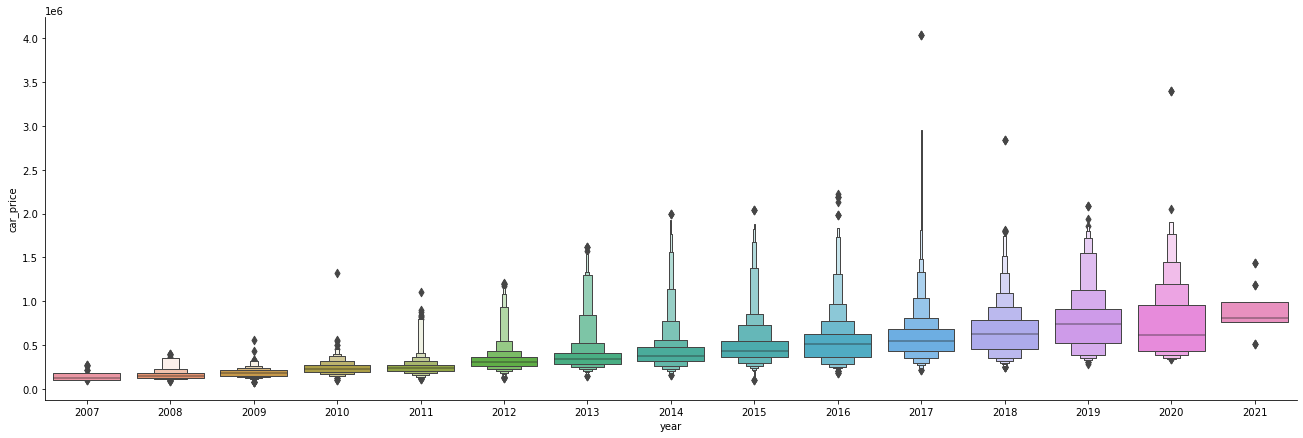

In [13]:
# year vs car_price
sns.catplot(y="car_price",x="year",data=df.sort_values("car_price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

#### From the above cat plot i can say that 2021 car brand have highest car price and remaining years cars values are less than 2021.

## cars_variant

In [14]:
df['cars_variant'].value_counts()

Petrol                   5173
Diesel                   3974
Petrol + CNG              350
h Owner\nDiesel             6
h Owner\nPetrol             6
h Owner\nPetrol + CNG       3
Name: cars_variant, dtype: int64

In [15]:
df['cars_variant'] = df['cars_variant'].str.replace('h Owner\nPetrol + CNG','Petrol')
df['cars_variant'] = df['cars_variant'].str.replace('h Owner\nPetrol','Petrol')
df['cars_variant'] = df['cars_variant'].str.replace('h Owner\nDiesel','Diesel')

In [16]:
df['cars_variant'].value_counts()

Petrol          5179
Diesel          3980
Petrol + CNG     353
Name: cars_variant, dtype: int64

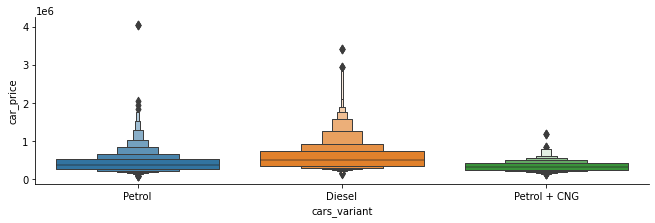

In [18]:
sns.catplot(y="car_price",x="cars_variant",data=df.sort_values("car_price",ascending=False),kind="boxen",aspect=3,height=3)
plt.show()

#### In above cat plot i can say that diesel used car prices are more as compare to petrol and cng.
#### In India diesel car are more preferable to purchase for an individual.

## cars_downpayment

In [19]:
df['cars_downpayment'].value_counts()

Zero downpayment    9512
Name: cars_downpayment, dtype: int64

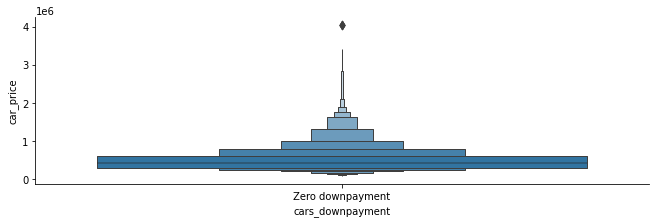

In [20]:
# selling_price vs cars_downpayment
sns.catplot(y="car_price",x="cars_downpayment",data=df.sort_values("car_price",ascending=False),kind="boxen",aspect=3,height=3)
plt.show()

#### From the above cat plot I can analyze that most of the used cars are purchased in zero downpayment.

In [11]:
df.head()

,year,brand,cars_model,cars_variant,cars_km_driven,car_installment_price_permonth,cars_downpayment,car_price
0,2015,Maruti Alto K10,VXI AMT Manual,Petrol,9013.0,7585.0,Zero downpayment,340999.0
1,2015,Hyundai Grand i10,ASTA 1.2 AT VTVT Automatic,Petrol,10438.0,10824.0,Zero downpayment,486599.0
2,2012,Maruti Wagon R 1.0,VXI Manual,Petrol,21852.0,5804.0,Zero downpayment,260899.0
3,2013,Maruti Wagon R 1.0,VXI Manual,Petrol,17781.0,6733.0,Zero downpayment,302699.0
4,2016,Maruti Wagon R 1.0,VXI AMT Automatic,Petrol,9520.0,8631.0,Zero downpayment,387999.0


## Label Encoder

#### Label Encoding is very simple approach and it involves converting each value in a column to a number.
#### Consider a dataset of used cars having a column names cars_variant,year,cars_variant and cars_downpayment having below values.
#### In data science, it is an important step, so I really encourage you to follow ideas in mind when dealing with categorical variables.

In [12]:
le = LabelEncoder()
df.brand = le.fit_transform(df.brand)
df.cars_model = le.fit_transform(df.cars_model)
df.cars_variant = le.fit_transform(df.cars_variant)
df.cars_downpayment = le.fit_transform(df.cars_downpayment)

In [13]:
df.describe()

,brand,cars_model,cars_variant,cars_km_driven,car_installment_price_permonth,cars_downpayment,car_price
count,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000,9512.0,9.512000e+03
mean,76.757675,461.367325,0.623423,62443.502418,11069.280172,0.0,4.976202e+05
std,34.020741,203.946181,0.571012,41606.822773,7062.559942,0.0,3.174976e+05
min,0.000000,0.000000,0.000000,23.000000,1602.000000,0.0,7.200000e+04
25%,47.000000,315.000000,0.000000,32716.750000,6589.000000,0.0,2.961990e+05
50%,79.000000,465.000000,1.000000,57489.000000,9091.000000,0.0,4.086990e+05
75%,94.000000,622.000000,1.000000,84046.750000,13371.000000,0.0,6.010990e+05
max,148.000000,785.000000,5.000000,912380.000000,89868.000000,0.0,4.040000e+06


#### After using label encoding in this dataset I use describe function to understand the dataset perfectly.

## Scatter Plot

#### Scatter plots are the graphs that present the relationship between two variables in a data-set.
#### It represents data points on a two-dimensional plane or on a Cartesian system. 
#### The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. 
#### These plots are often called scatter graphs or scatter diagrams.
#### Scatter plots are used in either of the following situations:
##### a) When I have paired numerical data,
##### b) When there are multiple values of the dependent variable for a unique value of an independent variable,
##### c) In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, 
##### checking whether two products that appear to be related both occur with the exact cause and so on.



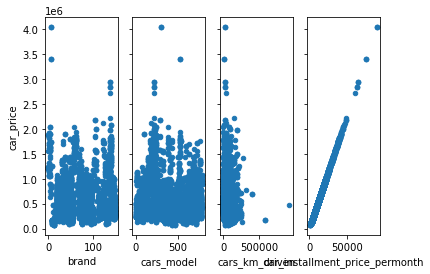

In [14]:
fig,axs = plt.subplots(1,4,sharey = True)
df.plot(kind='scatter',x='brand',y='car_price',ax=axs[0])
df.plot(kind='scatter',x='cars_model',y='car_price',ax=axs[1])
df.plot(kind='scatter',x='cars_km_driven',y='car_price',ax=axs[2])
df.plot(kind='scatter',x='car_installment_price_permonth',y='car_price',ax=axs[3])
fig.savefig('testdata.jpg')

#### By analysing  scatter plot I can determine that continuous  columns has important relationship in used cars and prices.

## Histogram Plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
##### THe following are some of the characteristics of histograms:
##### a)provides us a count of the number of observations in each bin created for visualization.
##### b)From the shape of the bin, I can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.
##### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'brand'}>,
        <AxesSubplot:title={'center':'cars_model'}>],
       [<AxesSubplot:title={'center':'cars_variant'}>,
        <AxesSubplot:title={'center':'cars_km_driven'}>],
       [<AxesSubplot:title={'center':'car_installment_price_permonth'}>,
        <AxesSubplot:title={'center':'cars_downpayment'}>],
       [<AxesSubplot:title={'center':'car_price'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

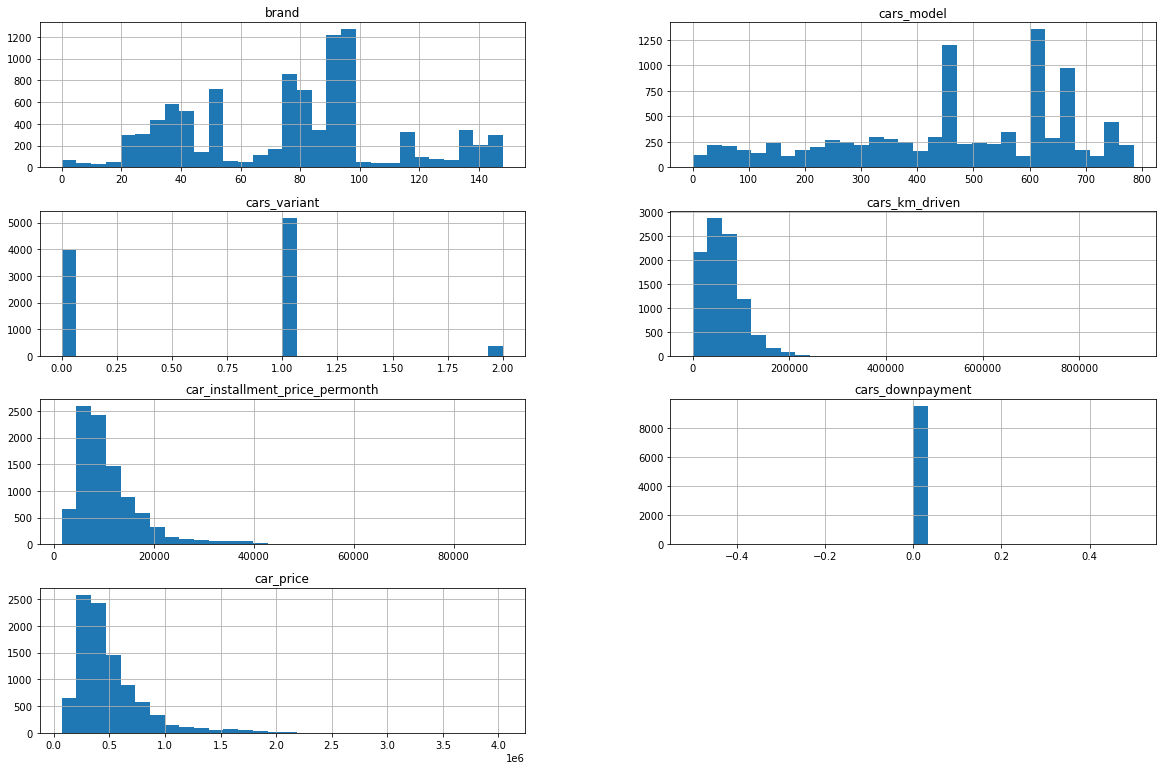

In [30]:
df.hist(figsize=(20,20),grid=True,layout=(6,2),bins=30)

#### The above output shows that it created the histogram for each attribute in the dataset. 
#### From this, I can observe that perhaps car_price, cars_downpyment, car_installment_price_permonth,cars_km_driven and cars_variant attribute may have exponential distribution while brand and cars_model have Gaussian distribution.

## Box Plot

#### In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. 
#### Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.
#### Boxplots are also very beneficial when large numbers of data sets are involved or compared. 
#### In simple words, I can define the box plot in terms of descriptive statistics related concepts. 
#### That means box or whiskers plot is a method used for depicting groups of numerical data through their quartiles graphically.

year                                 AxesSubplot(0.125,0.772143;0.352273x0.107857)
brand                             AxesSubplot(0.547727,0.772143;0.352273x0.107857)
cars_model                           AxesSubplot(0.125,0.642714;0.352273x0.107857)
cars_variant                      AxesSubplot(0.547727,0.642714;0.352273x0.107857)
cars_km_driven                       AxesSubplot(0.125,0.513286;0.352273x0.107857)
car_installment_price_permonth    AxesSubplot(0.547727,0.513286;0.352273x0.107857)
cars_downpayment                     AxesSubplot(0.125,0.383857;0.352273x0.107857)
car_price                         AxesSubplot(0.547727,0.383857;0.352273x0.107857)
dtype: object

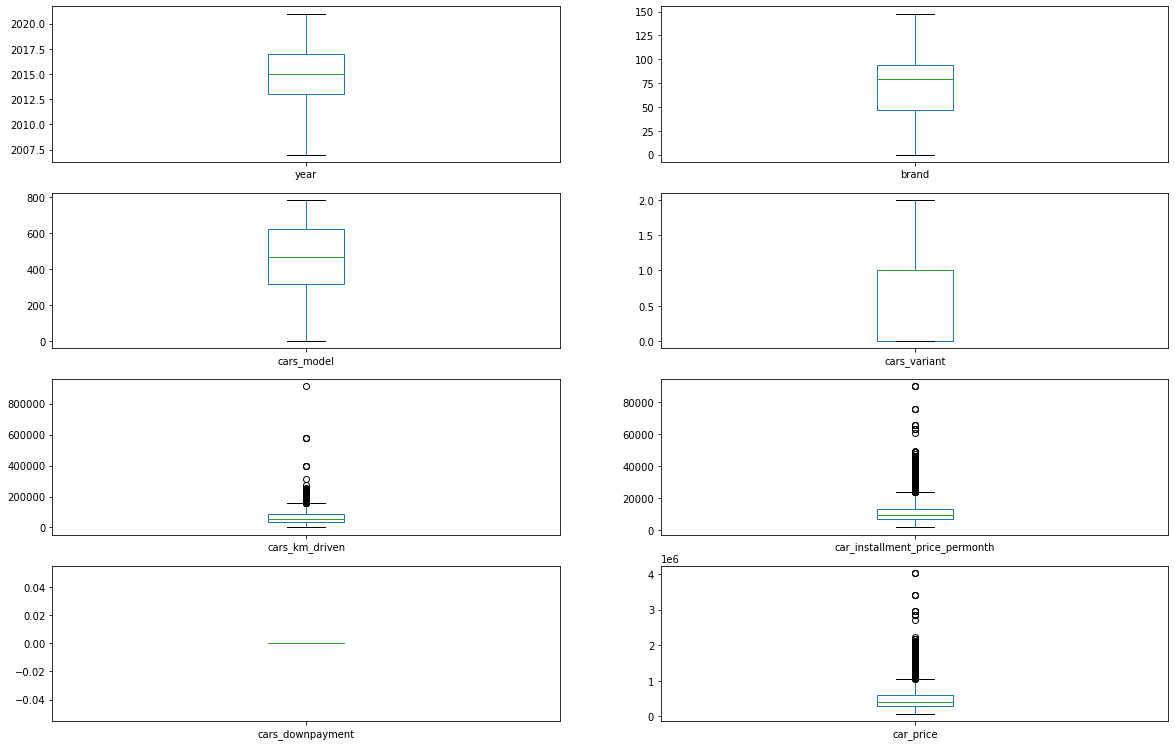

In [31]:
df.plot(kind='box',subplots=True,figsize=(20,20),layout=(6,2))

#### From the above box plot I can see that some columns have outliers which I will remove soon.

## zscore

#### The z score is also called the standard score represents the number of standard deviations with which the value of an observation point or data differ than the mean value of what is observed.

In [33]:
z_score = zscore(df[['car_price','car_installment_price_permonth','cars_km_driven']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]

In [34]:
df.shape

(9209, 8)

#### I am using zscore to remove it by replacing the outliers with the continuous columns.
#### And from shape I got 9209 rows which shows major of the outliers are cleaned.

## Checking the histogram after removing outliers.

array([[<AxesSubplot:title={'center':'brand'}>,
        <AxesSubplot:title={'center':'cars_model'}>],
       [<AxesSubplot:title={'center':'cars_variant'}>,
        <AxesSubplot:title={'center':'cars_km_driven'}>],
       [<AxesSubplot:title={'center':'car_installment_price_permonth'}>,
        <AxesSubplot:title={'center':'cars_downpayment'}>],
       [<AxesSubplot:title={'center':'car_price'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

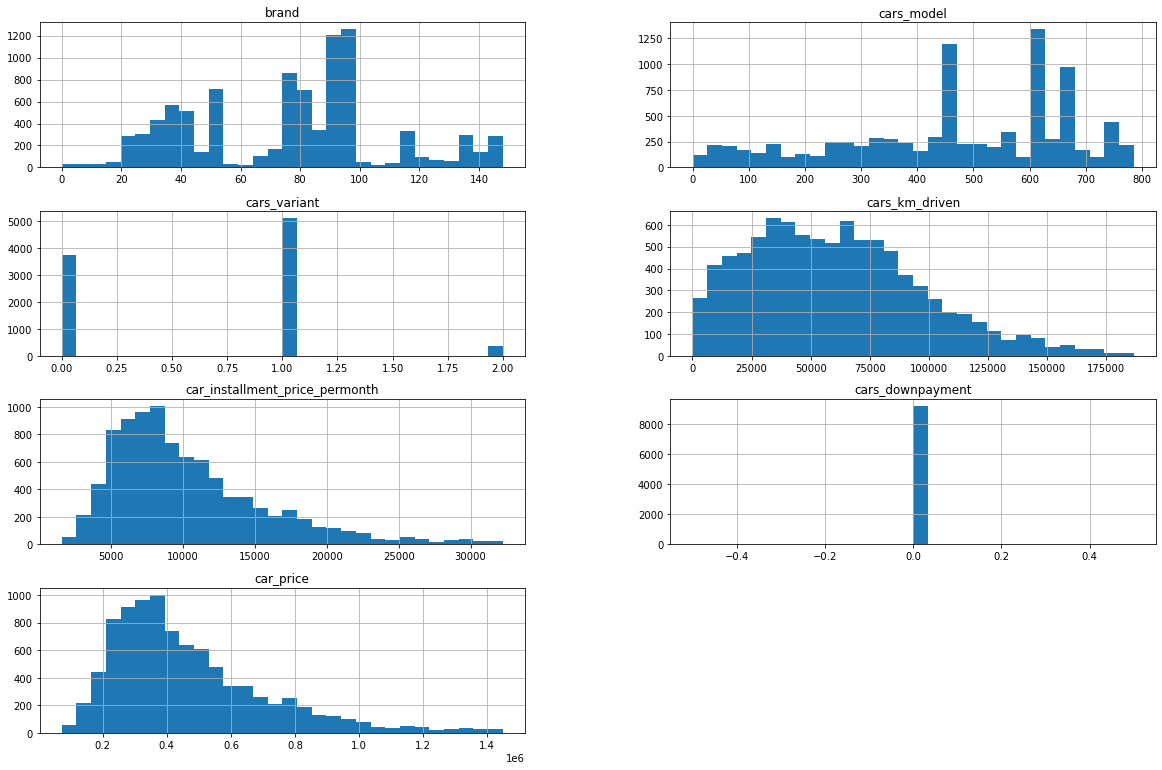

In [35]:
df.hist(figsize=(20,20),grid=True,layout=(6,2),bins=30)

#### After Removing Skewness of most of the columns now it is perfectly distributed  for Model Building.

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fullfill its purpose. 
#### Lack of data will prevent you from building the model.
#### Regression is a supervised machine learning technique which is used to predict continuous values.

#### To find out the relationship between all the input variable I have used correlation function and find out whether there is a positive/negative relationship between a pair of variables. 
#### It shows the correlation between different features and label.

In [37]:
# dividing features and label
x = df.drop('car_price',axis=1)
y = df.car_price

#### Splitting the dataset into the features and label.

## Standard Scaler

#### The scikit library provides various types of scalers above I will used the StandardScaler to scale the data.

In [38]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.04939955,  0.04691275,  0.94059467, ..., -1.42039242,
        -0.52037546,  0.        ],
       [ 0.04939955, -1.00686689, -0.94596907, ..., -1.38145259,
         0.07872978,  0.        ],
       [-1.00855503,  0.61896456,  0.97989808, ..., -1.06955141,
        -0.8498001 ,  0.        ],
       ...,
       [-1.71385808, -1.36816276,  0.7047742 , ..., -0.49526411,
        -0.7745189 ,  0.        ],
       [-0.30325198, -1.81978261, -0.62171593, ...,  0.25443003,
        -1.17663523,  0.        ],
       [-1.00855503,  0.95015244, -1.26530929, ...,  2.18565416,
         0.36672202,  0.        ]])

### VIF - variance inflation factor

In [39]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.997203,year
1,1.142847,brand
2,1.142968,cars_model
3,1.382204,cars_variant
4,1.650652,cars_km_driven
5,1.741130,car_installment_price_permonth
6,NaN,cars_downpayment


##### By using Variance Inflation Factor(VIF) I can see that there is a strong relationship among many Features as values are greater than 5 which shows there is multi-collinearity exists.